In [1]:
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


# What are Contours
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition


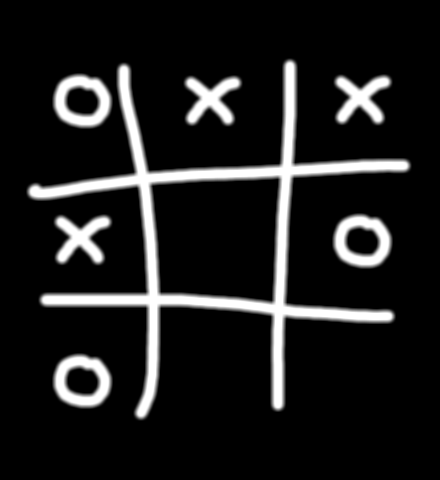

In [39]:
#Importing the Necessary Packages
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
#Load the image and convert it to grayscale
image = cv2.imread('/content/mydrive/My Drive/contours_tictactoe.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5),np.float32)/25
gray = cv2.filter2D(gray,-1,kernel)
cv2_imshow(gray)

In [40]:
#Find all contours on the image
contours = cv2.findContours(gray.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)



# 1. Moments
Image moments help you to calculate some features like center of mass of the object, area of the object etc.


In [41]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

#From this moments, you can extract useful data like area, centroid etc. Centroid is given by the relations, Cx=M10M00 and Cy=M01M00. This can be done as follows:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx)
print(cy)

{'m00': 2830.5, 'm10': 231740.16666666666, 'm01': 1077666.3333333333, 'm20': 19675345.083333332, 'm11': 88260295.125, 'm02': 410888705.5833333, 'm30': 1725895905.0500002, 'm21': 7495894943.233334, 'm12': 33662567295.433334, 'm03': 156884487561.2, 'mu20': 702193.7508145384, 'mu11': 29037.150182053447, 'mu02': 584969.1409693956, 'mu30': 45086.28018808365, 'mu21': 76133.45792725682, 'mu12': -37131.935284122825, 'mu03': -65645.86361694336, 'nu20': 0.08764570559705732, 'nu11': 0.0036243294863869697, 'nu02': 0.07301408343964097, 'nu30': 0.00010577584601154288, 'nu21': 0.00017861488879644221, 'nu12': -8.711434725462308e-05, 'nu03': -0.00015401019406067093}
81
380


# 2. Contour Area and Perimeter
Contour area is given by the function cv.contourArea() or from moments .

It is also called arc length. It can be found out using cv.arcLength() function. Second argument specify whether shape is a closed contour (if passed True), or just a curve.



In [42]:
#Area
area = cv2.contourArea(cnt)
print("Area : {}".format(area))

#Perimeter
perimeter = cv2.arcLength(cnt,True)
print("Perimeter : {}".format(perimeter))

Area : 2830.5
Perimeter : 200.1248904466629


# 3.a) Contour Approximation
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm.



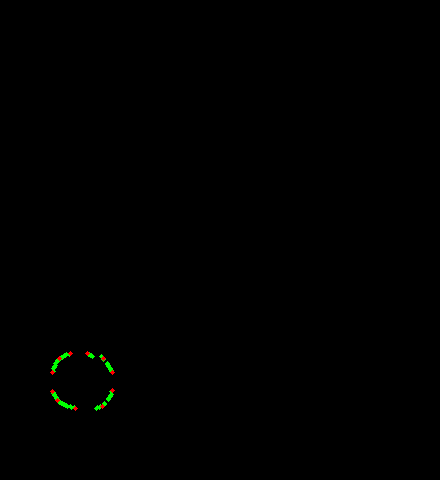

In [43]:
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
canvas = np.zeros(image.shape, np.uint8)
cv2.drawContours(canvas,cnt,-1,(0,255,0),3)
cv2.drawContours(canvas, approx, -1, (0, 0, 255), 3)
cv2_imshow(canvas)


# 3.b) Convex Hull
Hull means the exterior or the shape of the object.

Therefore, the Convex Hull of a shape or a group of points is a tight fitting convex boundary around the points or the shape.




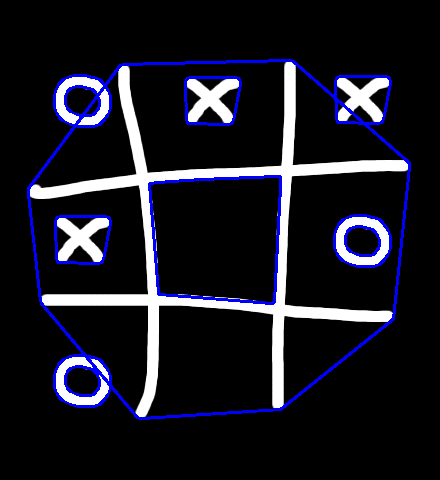

In [44]:

#Load the image
img1 = cv2.imread('/content/mydrive/My Drive/contours_tictactoe.png')
#Convert it to grey Scale
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#Threshold the image
ret,thres = cv2.threshold(img,50,255,0)
#Find the Contours
contours,hierarchy = cv2.findContours(thres,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#For each contour ,find the convex hull and draw it
#on the original image
for i in range(len(contours)):
  hull = cv2.convexHull(contours[i])
  cv2.drawContours(img1,[hull],-1,(255,0,0),2)
#Display Final convex hull image
cv2_imshow(img1)


# 4.) Checking Convexity
There is a function to check if a curve is convex or not, cv2.isContourConvex(). It just return whether True or False. Not a big deal.


In [45]:
k = cv2.isContourConvex(cnt)
print(k)

False


The curve is not Convex.

5.a) Straight Bounding Rectangle
It is a straight rectangle, it doesn’t consider the rotation of the object. So area of the bounding rectangle won’t be minimum. It is found by the function cv2.boundingRect().

Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.


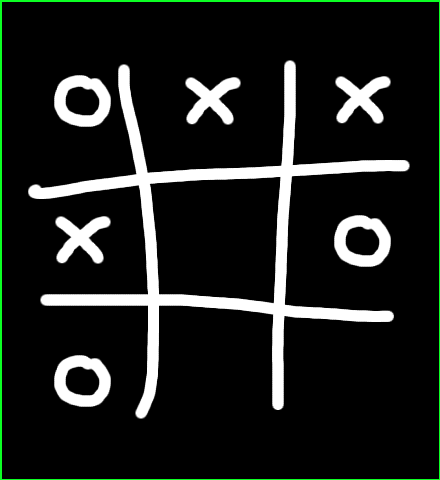

In [46]:
image = cv2.imread('/content/mydrive/My Drive/contours_tictactoe.png')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

cv2_imshow(image)


*******************************************
# After these Properites , I have changed the image to get a better insight to the properties.
*******************************************

# 5.a) Straight Bounding Rectangle
It is a straight rectangle, it doesn't consider the rotation of the object. So area of the bounding rectangle won't be minimum. It is found by the function cv.boundingRect().

Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

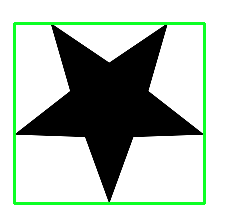

In [49]:
image = cv2.imread('/content/mydrive/My Drive/star.png')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

cv2_imshow(image)

#7.b) Rotated Rectangle
Here, bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is cv2.minAreaRect(). It returns a Box2D structure which contains following detals - ( top-left corner(x,y), (width, height), angle of rotation ). But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function cv2.boxPoints()

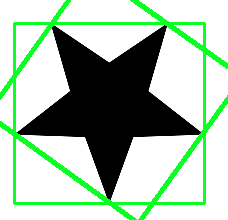

In [50]:
# Find contours, find rotated rectangle, obtain four verticies, and draw 
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
rect = cv2.minAreaRect(cnts[0])
box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(image, [box], 0, (36,255,12), 3) # OR
# cv2.polylines(image, [box], True, (36,255,12), 3)

cv2_imshow(image)


# 6.) Minimum Enclosing Circle
Next we find the circumcircle of an object using the function cv.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.


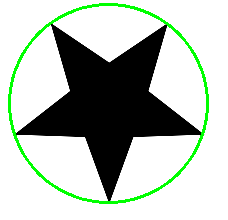

In [56]:
image = cv2.imread('/content/mydrive/My Drive/star.png')

## find centers 
for cnt in cnts:
  (x,y),radius = cv2.minEnclosingCircle(cnt)
  center = (int(x),int(y))
  radius = int(radius)
  cv2.circle(image,center,radius,(0,255,0),2)

cv2_imshow(image)

# 7.) Fitting an Ellipse
Next one is to fit an ellipse to an object. It returns the rotated rectangle in which the ellipse is inscribed.


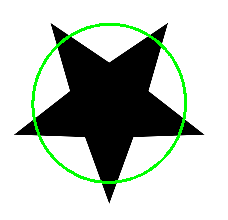

In [61]:
image = cv2.imread('/content/mydrive/My Drive/star.png')
for cnt in cnts:
  ellipse = cv2.fitEllipse(cnt)
  cv2.ellipse(image,ellipse,(0,255,0),2)
cv2_imshow(image)


# 8.) Fitting a Line
Similarly we can fit a line to a set of points. Below image contains a set of white points. We can approximate a straight line to it.


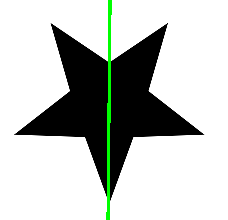

In [63]:
image = cv2.imread('/content/mydrive/My Drive/star.png')
for cnt in cnts:
  rows,cols = image.shape[:2]
  [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
  lefty = int((-x*vy/vx) + y)
  righty = int(((cols-x)*vy/vx)+y)
  cv2.line(image,(cols-1,righty),(0,lefty),(0,255,0),2)
cv2_imshow(image)